# Vigenère cipher
Vigenere encryption, decryption and ciphertext-only attack in python. [@gjs990825](https://github.com/gjs990825)
Check [Vigenère cipher](https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher) on Wikipedia for more information.

___
## Part 1. Encryption and decryption

### The code

In [1]:
from dataclasses import dataclass
from itertools import cycle, starmap

# constants
A = ord('A')
MAX_KEY_LENGTH = 50
MAX_KEY_CANDIDATE = 10
MAX_DUPLICATED_PART = 0.7

# frequency taken from https://en.wikipedia.org/wiki/Letter_frequency
FREQ_ENGLISH = [0.08167, 0.01492, 0.02782, 0.04253, 0.12702, 0.02228,
                0.02015, 0.06094, 0.06966, 0.00153, 0.00772, 0.04025,
                0.02406, 0.06749, 0.07507, 0.01929, 0.00095, 0.05987,
                0.06327, 0.09056, 0.02758, 0.00978, 0.0236, 0.0015,
                0.01974, 0.00074]
# IC(index of coincidence) expected for english
IC_ENGLISH = sum(f * f for f in FREQ_ENGLISH) * 26


def alpha_only(text):  # -> str:
    """ get all capitalized alpha only text """
    return ''.join(filter(lambda c: c.isalpha(), text)).upper()


class Vigenere:
    def __init__(self, keyword: str):
        self.keyword = alpha_only(keyword)

    @staticmethod
    def get_cipher(p, k):  # -> str:
        """ encrypt character p using character k as key """
        return chr(A + ((ord(p) - A) + (ord(k) - A)) % 26)

    @staticmethod
    def get_plain(c, k):  # -> str:
        """ decrypt character c using character k """
        return chr(A + ((ord(c) - A) - (ord(k) - A)) % 26)

    @staticmethod
    def extract_extra(text):
        """ extract spaces and other non-alpha character's positional information """
        return list(filter(lambda x: not x[1].isalpha(), enumerate(text)))

    @staticmethod
    def add_extra(text, extra):
        text = list(text)
        for e in extra:
            text.insert(*e)
        return ''.join(text)

    def encrypt(self, plain_text, keep_extra=False):  # -> str:
        extra = self.extract_extra(plain_text) if keep_extra else []
        plain_text = alpha_only(plain_text)
        cipher_text = ''.join(starmap(self.get_cipher, zip(plain_text, cycle(self.keyword))))
        return self.add_extra(cipher_text, extra) if extra else cipher_text

    def decrypt(self, cipher_text, keep_extra=False):  # -> str:
        extra = self.extract_extra(cipher_text) if keep_extra else []
        cipher_text = alpha_only(cipher_text)
        plain_text = ''.join(starmap(self.get_plain, zip(cipher_text, cycle(self.keyword))))
        return self.add_extra(plain_text, extra) if extra else plain_text

    def encrypt_file(self, in_path, out_path, keep_extra=True):
        with open(in_path, 'r') as in_file, open(out_path, 'w') as out_file:
            cipher_text = self.encrypt(in_file.read(), keep_extra)
            out_file.write(cipher_text)

    def decrypt_file(self, in_path, out_path, keep_extra=True):
        with open(in_path, 'r') as in_file, open(out_path, 'w') as out_file:
            plain_text = self.decrypt(in_file.read(), keep_extra)
            out_file.write(plain_text)

### Load test example

In [2]:
try:
    with open('original.txt', 'r') as f:
        original_text = f.read()
except FileNotFoundError as e:
    print(e)
    original_text = ''

print(original_text)

Differential Privacy is the state-of-the-art goal for the problem of privacy-preserving data release and privacy-preserving data mining. Existing techniques using differential privacy, however, cannot effectively handle the publication of high-dimensional data. In particular, when the input dataset contains a large number of attributes, existing methods incur higher computing complexity and lower information to noise ratio, which renders the published data next to useless. This proposal aims to reduce computing complexity and signal to noise ratio. The starting point is to approximate the full distribution of high-dimensional dataset with a set of low-dimensional marginal distributions via optimizing score function and reducing sensitivity, in which generation of noisy conditional distributions with differential privacy is computed in a set of low-dimensional subspaces, and then, the sample tuples from the noisy approximation distribution are used to generate and release the synthetic 

### Encryption and decryption test

In [4]:
v = Vigenere('infosec')
# cipher_text = v.encrypt(original_text, keep_extra=True)
cipher_text = v.encrypt(original_text)
decrypted_text = v.decrypt(cipher_text, keep_extra=True)
cipher_text, decrypted_text

('LVKTWVGVGNODTTQIFQQMUBUJGLEVMBKHZICZGLCSPHWEYVWTTWOQSESHXENJSGAXEJGWVXQALRSXCZRQSSWGIAIDJMXIPDDJIUMEAWFKFIGFAARKVTJLAWVQALHWGJVVVIWWWAVSUVMHNRWSFXKIYUFAZCKLMCOIXMEHOFRQBRKTWGVQIJZQLCVQQSLLGXHGZAGCBVTBGJJQTMRAQGVFNCFENLNYOARRIEYWUYNIEBVWRVPRNBHYVLNYOKIVKBSHSMPANQOJKGVHRPWVQNNYHJMDCGJGWBKAGNBYQGBUTRKMPKHWVAKJMEHCETWBVSUUSOXYJLAXAIAIZGAGZVSTGVOIGNCFXQVBNGWVCBVTKZMEPEJBVITAGMSHYDTVXVWHFIGFBWBVBBZGWPGAFYVAWRZBUCKENIVRGLSTMQZQWGQUCZHARIKBRDDIZQGDOFHUQTSODXQVBNGWVCBVTHZIUBNWHARIXBNBLMUBBFDHVQFVROLIVPRKIDPFQFYFAFWBVTBGJJQTMRAQGVFNCFENLNYOKIVEVYVSWGBBKZGAFQZJBKMQVNQASVIQAFZVMUBENPMXKWAXJAEQXGNAADKVTXQGVGNHSQLMQVNSRJIFCPNBYWGVFNHAZKBLNBOLKKULSFITIGNCFSHVBNGQGQVQNHASPIYIWKXTQOZHASPAJNHZHKNSJFWRVQNQDJMXIPDWKGQUCZHWHKVNXSLSHTBBRAQGVFNCFENAHGGHEEMFFBVXJMAYVWWCUCQSLYRTRXTJSOBUJBGMUGNUDJSZQZFHASPLVXHJMDCGNCFETMHXSVXQORSSJEVMNSRJINMNXSLLGALSHZIVQPIOLEUMGXCEIEZHHWSPUKVJBUIRZBGZWQUEBZZVFGQAASKXKONYSVFGTBBWUSPAGWIUXKVTFZGAMLRLFWIDILJGAEPVRYKGVMWIJFLLGPVLVVMOMAXWGRCTQFHSWGBINOWBRWAJBLMCTZJQZEPQFRWFHKNSJF

### File operations

In [39]:
v = Vigenere('infosec')
v.encrypt_file('original.txt', 'encrypted.txt', keep_extra=True)
v.decrypt_file('encrypted.txt', 'decrypted.txt', keep_extra=True)

---
## Part 2. Ciphertext-only attack
Based on [index of coincidence](https://en.wikipedia.org/wiki/Index_of_coincidence) technique, see [example section](https://en.wikipedia.org/wiki/Index_of_coincidence#Example) for details.

In [6]:
def index_of_coincidence(text):  # -> float:
    """ calculate IC(index of coincidence) of given string sequence
    Check this for details: https://en.wikipedia.org/wiki/Index_of_coincidence"""
    n = len(text)
    if n <= 1:
        return 26  # or should I raise an error here?
    counts = [0 for _ in range(26)]
    for c in text:
        counts[ord(c) - A] += 1
    return sum(c * (c - 1) for c in counts) / (n * (n - 1) / 26)


def group_with_length(text, n):  # -> list[list[str]]:
    """ i_th item falls into (i % length)_th group """
    results = [[] for _ in range(n)]
    for i, c in enumerate(text):
        results[i % n].append(c)
    return results


@dataclass(frozen=True)
class KeyInfo:
    length: int
    ic: float


@dataclass(frozen=True)
class Key:
    key: str
    ic: float


def guess_key_length(text):  # -> list[KeyInfo]:
    """ compare AVERAGE IC of every key length in [1, MAX_KEY_LENGTH),
     return the top MAX_KEY_CANDIDATE ones close to IC_ENGLISH """
    key_info = []
    for length in range(1, min(MAX_KEY_LENGTH, len(text))):
        substrings = group_with_length(text, length)
        average_ic = sum(index_of_coincidence(ss) for ss in substrings) / len(substrings)
        key_info.append(KeyInfo(length, average_ic))
    return sorted(key_info, key=lambda x: abs(x.ic - IC_ENGLISH))[:10]


def correlation_of(text):  # -> float:
    """ correlation between the text letter frequencies and the relative letter frequencies for normal English text """
    n = len(text)
    counts = [0] * 26
    for c in text:
        counts[ord(c) - A] += 1
    return sum(counts[i] / n * FREQ_ENGLISH[i] for i in range(26))


def get_single_key(text):  # -> str:
    """ test every character as key for given text, use the one that has the highest correlation """
    correlations, max_idx = [], 0
    for i in range(26):
        v = Vigenere(chr(A + i))
        correlations.append(correlation_of(v.decrypt(text)))
        if correlations[i] > correlations[max_idx]:
            max_idx = i
    return chr(A + max_idx)

In [9]:
def crack_virginia(cipher_text, keep_extra=True, save_to=None):  # -> list[Key]:
    extra = Vigenere.extract_extra(cipher_text) if keep_extra else []
    cipher_text, keys = alpha_only(cipher_text), []

    # try all possible key length, find their corresponding keys
    for key_info in guess_key_length(cipher_text):
        substrings = group_with_length(cipher_text, key_info.length)
        key = Key(''.join(get_single_key(ss) for ss in substrings), key_info.ic)
        print(f'Key length {key_info.length}, IC = {key_info.ic:.3f}: {key.key}')
        keys.append(key)

    # add extra information back
    cipher_text = Vigenere.add_extra(cipher_text, extra)

    # remove similar(the ones have duplicated part bigger than MAX_DUPLICATED_PART) keys
    copy, keep = sorted(keys, key=lambda k: len(k.key)), []
    while len(copy) > 1:
        drop = False
        for other in copy[:-1]:
            original = len(copy[-1].key)
            processed = len(copy[-1].key.replace(other.key, ''))
            if (1 - processed / original) > MAX_DUPLICATED_PART:
                drop = True
                break
        if not drop:
            keep.insert(0, copy[-1])
        copy.pop()
    keep.extend(copy)
    keys = list(filter(lambda k: k in keep, keys))

    # save decoding results
    if save_to:
        with open(save_to, 'w') as save_file:
            for key in keys:
                save_file.write(f'Decrypt using {key}:\n')
                v = Vigenere(key.key)
                save_file.write(v.decrypt(cipher_text, keep_extra))
                save_file.write('\n\n')
            print(f'check file {save_to} for cracking results')
    # or print them
    else:
        for key in keys:
            print(f'Decrypt using {key}:')
            v = Vigenere(key.key)
            print(v.decrypt(cipher_text, keep_extra), end='\n\n')
    return keys

### Breaking the example cipher

In [7]:
cipher_text = Vigenere('infosec').encrypt(original_text, keep_extra=True)
crack_virginia(cipher_text, keep_extra=True)

Key length 7, IC = 1.711: INFOSEC
Key length 28, IC = 1.713: INFOSECINFOSECINFOSECINFOSEC
Key length 14, IC = 1.713: INFOSECINFOSEC
Key length 21, IC = 1.684: INFOSECINFOSECINFOSEC
Key length 35, IC = 1.676: INFOSECINFOSECINFOSECINFOSECINFOSEC
Key length 42, IC = 1.669: INFOSECINFOSECINFOSECINFOSECINFOSECINUOSEC
Key length 49, IC = 1.624: XNFOSECINFOSECINFOSECINFOSECINFOSECINFOSECINFOSEC
Key length 30, IC = 1.137: SCOOSSJSCEOANRSNNICWJOSNODPXNB
Key length 40, IC = 1.122: SCDNPSJJCRTROASOCIZQUSSESECDRXJHIIGOTOCN
Key length 29, IC = 1.119: WDOERNOSCCRUCNJASJCOCXIODIPIN
Decrypt using Key(key='INFOSEC', ic=1.711004490531436):
DIFFERENTIAL PRIVACY IS THE STATE-OF-THE-ART GOAL FOR THE PROBLEM OF PRIVACY-PRESERVING DATA RELEASE AND PRIVACY-PRESERVING DATA MINING. EXISTING TECHNIQUES USING DIFFERENTIAL PRIVACY, HOWEVER, CANNOT EFFECTIVELY HANDLE THE PUBLICATION OF HIGH-DIMENSIONAL DATA. IN PARTICULAR, WHEN THE INPUT DATASET CONTAINS A LARGE NUMBER OF ATTRIBUTES, EXISTING METHODS INCUR HIGHER C

[Key(key='INFOSEC', ic=1.711004490531436),
 Key(key='SCOOSSJSCEOANRSNNICWJOSNODPXNB', ic=1.1365478686233401),
 Key(key='SCDNPSJJCRTROASOCIZQUSSESECDRXJHIIGOTOCN', ic=1.121788617886179),
 Key(key='WDOERNOSCCRUCNJASJCOCXIODIPIN', ic=1.1186843807533462)]

### Break from file

In [8]:
def crack_virginia_from_file(in_path, out_path):
    with open(in_path, 'r') as in_file:
        crack_virginia(in_file.read(), save_to=out_path)


crack_virginia_from_file('cipher_to_break.txt', 'breaking_results.txt')

Key length 16, IC = 1.730: MAVERICKMAVERICK
Key length 40, IC = 1.731: MAVERICKMAVERICKMAVIRICKMAVERICKMAVERICK
Key length 8, IC = 1.739: MAVERICK
Key length 24, IC = 1.740: MAVERICKMAVERICKMAVERICK
Key length 48, IC = 1.745: MAVERICKMAVERICKMAVERICKMAVERICKMAVERICKMAVERICK
Key length 32, IC = 1.760: MAVERICKMAVERICKMAVERICKBAVERICK
Key length 36, IC = 1.368: MICKRMVKRAVKREGUCICERNCKRWCEREVDRAGK
Key length 20, IC = 1.345: RAVKRICZRIVERICERIVK
Key length 28, IC = 1.343: RIWTMIVKRAVERIRERIRKRICKRAVK
Key length 12, IC = 1.341: RICKRIVERIVK
check file breaking_results.txt for cracking results


### brute force attack

In [20]:
from string import ascii_uppercase
from itertools import product
def brute_force_vigenere(original_text, cipher_text):
    for length in range(len(cipher_text)):
        for key in product(ascii_uppercase, repeat=length):
            v = Vigenere(''.join(key))
            if v.decrypt(cipher_text) == original_text:
                # print(f"The keys is:{''.join(key)}\nThe decrypted text is:\n{v.decrypt(cipher_text)}")
                return 1
    return None
with open('ori.txt', 'r') as f:
    v = Vigenere('info')
    original_text = f.read()
    original_text = alpha_only(original_text)
    cipher_text = v.encrypt(original_text)
    brute_force_vigenere(original_text,cipher_text)

### 测试时间

In [27]:
import secrets
import string
from time import time
def generate_string(length):
    alphabet = string.ascii_letters
    random_string = ''.join(secrets.choice(alphabet) for _ in range(length))
    return random_string
avg_sec = []
with open('ori.txt', 'r') as f:
    original_text = f.read()
    original_text = alpha_only(original_text)
    for k_length in range(1,6):
        begin = time()
        for times in range(1,31):
            keys = generate_string(k_length)
            v = Vigenere(keys)
            cipher_text = v.encrypt(original_text)
            brute_force_vigenere(original_text,cipher_text)
        end = time()
        avg_sec.append((end-begin)/30)
        print((end-begin)/30)
avg_sec

0.00016671021779378256
0.0033726056416829428
0.0943511168162028
2.3974599043528237
62.997820631663004


[0.00016671021779378256,
 0.0033726056416829428,
 0.0943511168162028,
 2.3974599043528237,
 62.997820631663004]

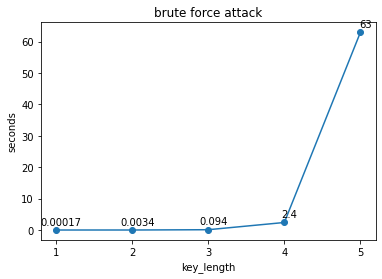

In [49]:
import matplotlib.pyplot as plt

def plot_line_chart(data):
    x = range(1, len(data) + 1)
    y = data
    plt.plot(x, y, marker='o')
    plt.xlabel('key_length')
    plt.ylabel('seconds')
    plt.xticks(x)
    plt.title('brute force attack')
    for i, j in zip(x, y):
        value = '{:.2g}'.format(j)
        plt.annotate(value, xy=(i, j), xytext=(5, 5), textcoords='offset points', ha='center')
        plt.savefig('brute force attack.jpg',dpi=300)
    plt.show()

plot_line_chart(avg_sec)
